In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
dat=plt.imread('./gurl.jpg')

In [3]:
dat.shape

(258, 258)

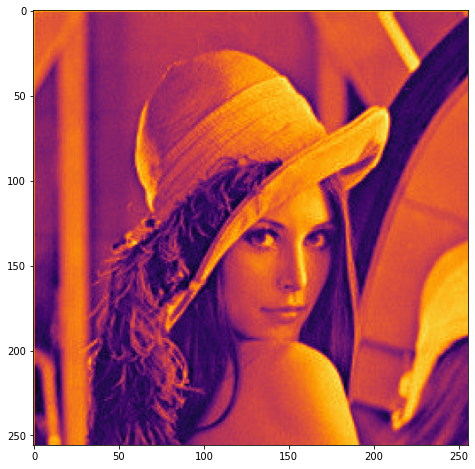

In [5]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(10,8)
ax.imshow(dat[:256,:256],aspect='equal',cmap='inferno')
# plt.colorbar()

In [6]:
im=dat[:256,:256].copy()
print(im.shape)

(256, 256)


In [7]:
imfft=np.fft.fft2(im)

In [8]:
imfft.shape

(256, 256)

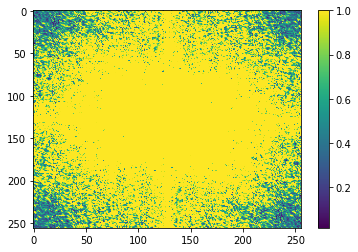

In [9]:
plt.imshow(np.fft.fftshift(np.abs(imfft))/1000,aspect='auto',vmax=1)
plt.colorbar()

In [10]:
vec=np.fft.fftfreq(256)*256
# print(vec)
X,Y=np.meshgrid(vec,vec)

In [29]:
# a highpass filter
kernel=np.ones((256,256))
kernel[X**2+Y**2<=2500]=0

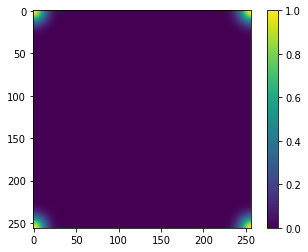

In [11]:
sigma=10
kernel= np.exp(-0.5*(X**2+Y**2)/sigma**2)
plt.imshow(kernel,aspect='equal')
plt.colorbar()

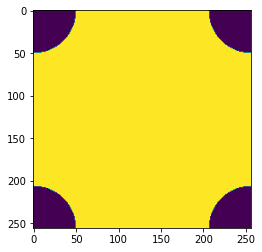

In [30]:
plt.imshow(kernel,aspect='equal')

In [31]:
# kft=np.fft.fft2

In [32]:
newimfft=imfft*kernel

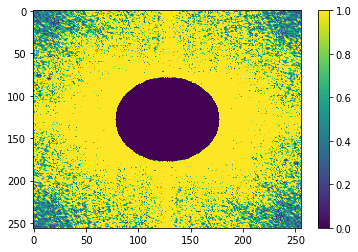

In [38]:
plt.imshow(np.fft.fftshift(np.abs(newimfft))/1000,aspect='auto',vmax=1)
plt.colorbar()

In [34]:
newimg=np.fft.ifft2(newimfft).real

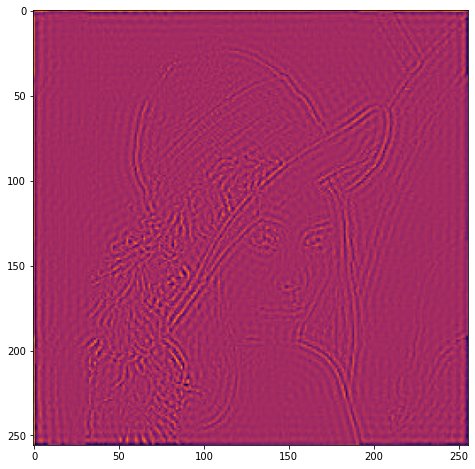

In [35]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.imshow(newimg,aspect='equal',cmap='inferno')